In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import glob
import os
import pickle
from matplotlib.pyplot import cm
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
cmaps = OrderedDict()
import matplotlib
import matplotlib.pyplot as plt
# import jax

In [4]:
trial_pair=[]
while len(trial_pair)<20:
    i=np.random.randint(0,20)
    if i not in trial_pair:
        trial_pair.append(i)
trial_pair=np.array(trial_pair).reshape(10,2)
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
BRG1_nat=md.load('./NSD3_BRG1/result_msa_mono/seq_msa_custom_unrelaxed_rank_1_model_2.pdb')
CHD4_nat=md.load('meld_medoids/CHD4_medoid_leap.pdb')
NSD3_nat=md.load('meld_medoids/NSD3_medoid_leap.pdb')
TP_nat=md.load('meld_medoids/TP_medoid_leap.pdb')
LANA_nat=md.load('meld_medoids/LANA_medoid_leap.pdb')
JMJD6_nat=md.load('meld_medoids/JMJD6_medoid_leap.pdb')
host_len=len(CHD4_nat.top.to_fasta()[0])
BRG1_dis = np.linalg.norm(np.average(BRG1_nat.xyz[0][BRG1_nat.top.select(f'name CA and resid {39+len(BRG1_nat.top.to_fasta()[0])} to {43+len(BRG1_nat.top.to_fasta()[0])}')],axis=0)-np.average(BRG1_nat.xyz[0][BRG1_nat.top.select('resid 3 to 8 and name CA')],axis=0))
CHD4_dis = np.linalg.norm(np.average(CHD4_nat.xyz[0][CHD4_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(CHD4_nat.xyz[0][CHD4_nat.top.select(f'resid {host_len+6} to  {host_len+7} and name CA')],axis=0))
NSD3_dis = np.linalg.norm(np.average(NSD3_nat.xyz[0][NSD3_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(NSD3_nat.xyz[0][NSD3_nat.top.select(f'resid {host_len+2} to  {host_len+7} and name CA')],axis=0))
TP_dis = np.linalg.norm(np.average(TP_nat.xyz[0][TP_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(TP_nat.xyz[0][TP_nat.top.select(f'resid {host_len+13} to  {host_len+19} and name CA')],axis=0))
LANA_dis = np.linalg.norm(np.average(LANA_nat.xyz[0][LANA_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(LANA_nat.xyz[0][LANA_nat.top.select(f'resid {host_len+5} to  {host_len+9} and name CA')],axis=0))
JMJD6_dis = np.linalg.norm(np.average(JMJD6_nat.xyz[0][JMJD6_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(JMJD6_nat.xyz[0][JMJD6_nat.top.select(f'resid {host_len} to  {host_len+11} and name CA')],axis=0))
BRG1_nat=md.load('meld_medoids/BRG1_medoid_leap.pdb')
binder_seq = [seq.top.to_fasta()[1] for seq in [LANA_nat,JMJD6_nat,CHD4_nat,NSD3_nat,BRG1_nat,TP_nat]]
binder_dis = [LANA_dis,JMJD6_dis,CHD4_dis,NSD3_dis,BRG1_dis,TP_dis]
binder_region = [[5,9],[0,11], [6,7],[2,7], [3,8],[13,19]]
binder=['LANA','JMJD6','CHD4','NSD3','BRG1','TP']
# binder_dis,trial_pair

In [21]:
results={}
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bb]+'_'+binder[bbb]
#         for trial in trials:
        all_seq = glob.glob(target+'/result_mono'+'/seq_unrelaxed_rank_*_model_*pdb')
        b_dis=[]
        c_dis=[]
        print(f'--------------{ target }----------------')
        for i in all_seq:
            a=md.load(i)
            chain0=a.top.to_fasta()[0]
            chain1=a.top.to_fasta()[1]
            chain2=a.top.to_fasta()[2]
            b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain0)][0]} to {binder_region[binder_seq.index(chain0)][1]} and name CA')],axis=0))
            c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain2)][0]+len(chain0)+len(chain1)} to {binder_region[binder_seq.index(chain2)][1]+len(chain0)+len(chain1)} and name CA')],axis=0))
            b_dis.append(round(abs(b-binder_dis[binder_seq.index(chain0)]),3))
            c_dis.append(round(abs(c-binder_dis[binder_seq.index(chain2)]),3))
            if binder_seq.index(chain0) > binder_seq.index(chain2):
                results[f'{binder[binder_seq.index(chain0)]}_{binder[binder_seq.index(chain2)]}']=[b_dis,c_dis]
            else:
                results[f'{binder[binder_seq.index(chain2)]}_{binder[binder_seq.index(chain0)]}']=[c_dis,b_dis]
        print(results)

--------------LANA_JMJD6----------------
{'JMJD6_LANA': [[0.192, 0.472, 0.928, 0.714, 0.768], [0.837, 0.486, 0.041, 1.015, 0.188]]}
--------------LANA_CHD4----------------
{'JMJD6_LANA': [[0.192, 0.472, 0.928, 0.714, 0.768], [0.837, 0.486, 0.041, 1.015, 0.188]], 'CHD4_LANA': [[0.1, 0.104, 0.106, 0.086, 0.103], [1.133, 1.096, 1.411, 0.834, 0.88]]}
--------------LANA_NSD3----------------
{'JMJD6_LANA': [[0.192, 0.472, 0.928, 0.714, 0.768], [0.837, 0.486, 0.041, 1.015, 0.188]], 'CHD4_LANA': [[0.1, 0.104, 0.106, 0.086, 0.103], [1.133, 1.096, 1.411, 0.834, 0.88]], 'NSD3_LANA': [[0.076, 1.124, 0.081, 0.083, 0.518], [2.072, 0.965, 1.794, 1.533, 0.17]]}
--------------LANA_BRG1----------------
{'JMJD6_LANA': [[0.192, 0.472, 0.928, 0.714, 0.768], [0.837, 0.486, 0.041, 1.015, 0.188]], 'CHD4_LANA': [[0.1, 0.104, 0.106, 0.086, 0.103], [1.133, 1.096, 1.411, 0.834, 0.88]], 'NSD3_LANA': [[0.076, 1.124, 0.081, 0.083, 0.518], [2.072, 0.965, 1.794, 1.533, 0.17]], 'BRG1_LANA': [[0.04, 0.021, 0.024, 0.165,

{'JMJD6_LANA': [[0.192, 0.472, 0.928, 0.714, 0.768], [0.837, 0.486, 0.041, 1.015, 0.188]], 'CHD4_LANA': [[0.1, 0.104, 0.106, 0.086, 0.103], [1.133, 1.096, 1.411, 0.834, 0.88]], 'NSD3_LANA': [[0.076, 1.124, 0.081, 0.083, 0.518], [2.072, 0.965, 1.794, 1.533, 0.17]], 'BRG1_LANA': [[0.04, 0.021, 0.024, 0.165, 0.003], [1.259, 1.16, 1.442, 1.06, 0.972]], 'TP_LANA': [[0.035, 0.043, 0.036, 0.06, 0.05], [2.632, 2.521, 1.999, 1.67, 1.337]], 'CHD4_JMJD6': [[0.117, 0.098, 0.108, 0.072, 0.084], [1.557, 1.662, 1.888, 1.438, 1.268]], 'NSD3_JMJD6': [[0.077, 0.699, 0.076, 0.084, 0.233], [2.053, 1.662, 2.404, 2.71, 1.119]], 'BRG1_JMJD6': [[0.033, 0.028, 0.01, 0.043, 0.101], [3.01, 2.393, 0.951, 1.455, 0.935]], 'TP_JMJD6': [[0.033, 0.041, 0.041, 0.032, 0.054], [3.301, 1.926, 2.735, 2.344, 1.959]], 'NSD3_CHD4': [[0.077, 0.065, 0.059, 1.217, 0.726], [1.59, 2.934, 1.863, 0.191, 0.002]], 'BRG1_CHD4': [[0.005, 0.023, 0.027, 0.024, 0.02], [0.483, 1.153, 1.025, 2.474, 0.664]], 'TP_CHD4': [[0.043, 0.06, 0.036, 0

In [22]:
with open('BET_single_mono_result.pkl','wb') as handle:
    pickle.dump(results,handle)

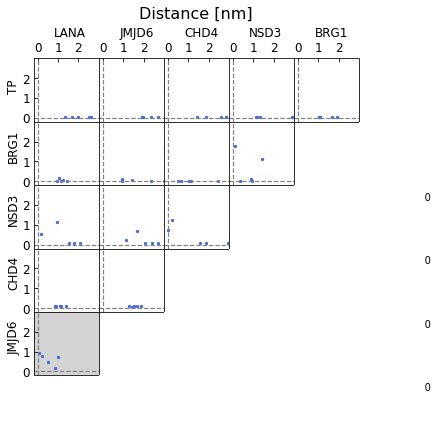

In [54]:
fig,ax=plt.subplots(6,6,figsize=(7,7))
mean, std = [],[]
# for d in ['','_r','_h01','_h10','_01h','_10h']:
bet_result=pickle.load(open(f'BET_single_mono_result.pkl', 'rb'))
tmp_mean,tmp_std=[],[]
for bb in range(5):
    ax[0][bb].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb][0].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb+1][5].tick_params(axis="y",direction="in",labelsize=12)
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bbb]+'_'+binder[bb]
        tmp_T=[]
        tmp_F=[]
        binder_0=[]
        binder_1=[]
        binder_0.append(bet_result[f'{target}'][0])
        binder_1.append(bet_result[f'{target}'][1])
        binder_0=np.concatenate(binder_0)
        binder_1=np.concatenate(binder_1)
#         print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
#         ax[5-bb][bbb].yaxis.tick_right()
#         box=ax[5-bb][bbb].boxplot(tmp_TF,patch_artist=True)
        ax[5-bb][bbb].spines['right'].set_visible(False)
        ax[5-bb][bbb].spines['top'].set_visible(False)
        ax[5-bb][bbb].spines['left'].set_visible(False)
        ax[5-bb][bbb].spines['bottom'].set_visible(False)
        ax[5-bb][bbb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)

        ax[5-bbb][bb].scatter(binder_1,binder_0,c='royalblue',edgecolor='royalblue',s=5)
#         ax1.yaxis.tick_left()
        ax[5-bbb][bb].set_xlim(-0.2,3)
        ax[5-bbb][bb].set_ylim(-0.2,3)
        ax[5-bbb][bb].set_yticks([0,1,2])
        ax[5-bbb][bb].set_xticks([0,1,2])
        ax[5-bbb][bb].xaxis.tick_top()
        ax[5-bbb][bb].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
        ax[5-bbb][bb].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
        if bb!=0:
            ax[5-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
        if bbb!=5:
            ax[5-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)

mean.append(tmp_mean)
std.append(tmp_std)
ax[5][5].set_yticks([0,0.5,1])
ax[5][0].spines['left'].set_visible(False)
ax[5][0].spines['bottom'].set_visible(False)
ax[0][5].spines['right'].set_visible(False)
ax[0][5].spines['top'].set_visible(False)

for i in range(6):
    ax[5-i][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5-i][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)


rect = ax[4][0].patch
rect.set_facecolor('lightgray')

ax[0][0].text(-1.5, 1.4,binder[5],fontsize=12,rotation=90)
ax[1][0].text(-1.5, 1.1,binder[4],fontsize=12,rotation=90)
ax[2][0].text(-1.5, 1.1,binder[3],fontsize=12,rotation=90)
ax[3][0].text(-1.5, 1.1,binder[2],fontsize=12,rotation=90)
ax[4][0].text(-1.5, 1.0,binder[1],fontsize=12,rotation=90)
ax[0][0].text(0.8, 4.1,binder[0],fontsize=12)
ax[0][1].text(0.8, 4.1,binder[1],fontsize=12)
ax[0][2].text(0.8, 4.1,binder[2],fontsize=12)
ax[0][3].text(0.8, 4.1,binder[3],fontsize=12)
ax[0][4].text(0.8, 4.1,binder[4],fontsize=12)
# ax[5][0].text(-0.4, 0.4,binder[0],fontsize=12,rotation=90)
ax[0][0].text(5,5,'Distance [nm]',fontsize=16)
# ax[0][5].text(6.6,4.5,'Sensitivity',fontsize=16,rotation=90)
for i in range(6):
    ax[5-i][i].spines['right'].set_visible(False)
    ax[5-i][i].spines['bottom'].set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('./BET_single_mono_result.pdf',bbox_inches = "tight")


In [96]:
results={}
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bb]+'_'+binder[bbb]
        for trial in trials:
            all_seq = glob.glob(target+'/result_01h_msa_uniref_custom_mono_'+trial+'/seq_01h_msa_uniref_custom_unrelaxed_rank_*_model_*pdb')
            b_dis=[]
            c_dis=[]
            print(f'--------------{ target, trial }----------------')
            for i in all_seq:
                a=md.load(i)
                chain0=a.top.to_fasta()[0]
                chain1=a.top.to_fasta()[1]
                chain2=a.top.to_fasta()[2]
                b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 2 and name CA and ({len(chain0)+len(chain1)+39} <= resid) and (resid <= {len(chain0)+len(chain1)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain0)][0]} to {binder_region[binder_seq.index(chain0)][1]} and name CA')],axis=0))
                c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 2 and name CA and ({len(chain0)+len(chain1)+39} <= resid) and (resid <= {len(chain0)+len(chain1)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain1)][0]+len(chain0)} to {binder_region[binder_seq.index(chain1)][1]+len(chain0)} and name CA')],axis=0))
                b_dis.append(round(abs(b-binder_dis[binder_seq.index(chain0)]),3))
                c_dis.append(round(abs(c-binder_dis[binder_seq.index(chain1)]),3))
            if binder_seq.index(chain0) > binder_seq.index(chain1):
                results[f'{binder[binder_seq.index(chain0)]}_{binder[binder_seq.index(chain1)]}_{trial}']=[b_dis,c_dis]
            else:
                results[f'{binder[binder_seq.index(chain1)]}_{binder[binder_seq.index(chain0)]}_{trial}']=[c_dis,b_dis]
        print(results)


--------------('LANA_JMJD6', '01')----------------
--------------('LANA_JMJD6', '02')----------------
--------------('LANA_JMJD6', '03')----------------
--------------('LANA_JMJD6', '04')----------------
--------------('LANA_JMJD6', '05')----------------
--------------('LANA_JMJD6', '06')----------------
--------------('LANA_JMJD6', '07')----------------
--------------('LANA_JMJD6', '08')----------------
--------------('LANA_JMJD6', '09')----------------
--------------('LANA_JMJD6', '10')----------------
--------------('LANA_JMJD6', '11')----------------
--------------('LANA_JMJD6', '12')----------------
--------------('LANA_JMJD6', '13')----------------
--------------('LANA_JMJD6', '14')----------------
--------------('LANA_JMJD6', '15')----------------
--------------('LANA_JMJD6', '16')----------------
--------------('LANA_JMJD6', '17')----------------
--------------('LANA_JMJD6', '18')----------------
--------------('LANA_JMJD6', '19')----------------
--------------('LANA_JMJD6', '2

--------------('LANA_NSD3', '15')----------------
--------------('LANA_NSD3', '16')----------------
--------------('LANA_NSD3', '17')----------------
--------------('LANA_NSD3', '18')----------------
--------------('LANA_NSD3', '19')----------------
--------------('LANA_NSD3', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033, 0.032, 1.503, 0.017]], 'JMJD6_LANA_02': [[0.92, 1.463, 0.82, 0.97, 2.083], [0.253, 0.031, 0.029, 0.071, 1.876]], 'JMJD6_LANA_03': [[0.938, 0.983, 1.386, 0.905, 2.196], [0.318, 0.048, 0.022, 0.018, 1.859]], 'JMJD6_LANA_04': [[1.484, 0.992, 1.441, 0.828, 2.694], [1.493, 0.074, 0.038, 0.034, 1.978]], 'JMJD6_LANA_05': [[1.366, 1.011, 1.378, 0.864, 2.366], [1.559, 0.084, 0.043, 0.065, 2.101]], 'JMJD6_LANA_06': [[0.063, 0.835, 1.346, 2.481, 0.996], [0.046, 0.03, 0.026, 1.892, 0.077]], 'JMJD6_LANA_07': [[1.739, 1.003, 1.374, 0.884, 2.827], [1.679, 0.078, 0.046, 0.005, 2.284]], 'JMJD6_LANA_08': [[0.963, 0.904, 1.301, 2.102, 0.894]

--------------('LANA_TP', '02')----------------
--------------('LANA_TP', '03')----------------
--------------('LANA_TP', '04')----------------
--------------('LANA_TP', '05')----------------
--------------('LANA_TP', '06')----------------
--------------('LANA_TP', '07')----------------
--------------('LANA_TP', '08')----------------
--------------('LANA_TP', '09')----------------
--------------('LANA_TP', '10')----------------
--------------('LANA_TP', '11')----------------
--------------('LANA_TP', '12')----------------
--------------('LANA_TP', '13')----------------
--------------('LANA_TP', '14')----------------
--------------('LANA_TP', '15')----------------
--------------('LANA_TP', '16')----------------
--------------('LANA_TP', '17')----------------
--------------('LANA_TP', '18')----------------
--------------('LANA_TP', '19')----------------
--------------('LANA_TP', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033, 0.032, 1.503, 0.01

--------------('JMJD6_CHD4', '02')----------------
--------------('JMJD6_CHD4', '03')----------------
--------------('JMJD6_CHD4', '04')----------------
--------------('JMJD6_CHD4', '05')----------------
--------------('JMJD6_CHD4', '06')----------------
--------------('JMJD6_CHD4', '07')----------------
--------------('JMJD6_CHD4', '08')----------------
--------------('JMJD6_CHD4', '09')----------------
--------------('JMJD6_CHD4', '10')----------------
--------------('JMJD6_CHD4', '11')----------------
--------------('JMJD6_CHD4', '12')----------------
--------------('JMJD6_CHD4', '13')----------------
--------------('JMJD6_CHD4', '14')----------------
--------------('JMJD6_CHD4', '15')----------------
--------------('JMJD6_CHD4', '16')----------------
--------------('JMJD6_CHD4', '17')----------------
--------------('JMJD6_CHD4', '18')----------------
--------------('JMJD6_CHD4', '19')----------------
--------------('JMJD6_CHD4', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.41

--------------('JMJD6_NSD3', '02')----------------
--------------('JMJD6_NSD3', '03')----------------
--------------('JMJD6_NSD3', '04')----------------
--------------('JMJD6_NSD3', '05')----------------
--------------('JMJD6_NSD3', '06')----------------
--------------('JMJD6_NSD3', '07')----------------
--------------('JMJD6_NSD3', '08')----------------
--------------('JMJD6_NSD3', '09')----------------
--------------('JMJD6_NSD3', '10')----------------
--------------('JMJD6_NSD3', '11')----------------
--------------('JMJD6_NSD3', '12')----------------
--------------('JMJD6_NSD3', '13')----------------
--------------('JMJD6_NSD3', '14')----------------
--------------('JMJD6_NSD3', '15')----------------
--------------('JMJD6_NSD3', '16')----------------
--------------('JMJD6_NSD3', '17')----------------
--------------('JMJD6_NSD3', '18')----------------
--------------('JMJD6_NSD3', '19')----------------
--------------('JMJD6_NSD3', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.41

--------------('JMJD6_BRG1', '02')----------------
--------------('JMJD6_BRG1', '03')----------------
--------------('JMJD6_BRG1', '04')----------------
--------------('JMJD6_BRG1', '05')----------------
--------------('JMJD6_BRG1', '06')----------------
--------------('JMJD6_BRG1', '07')----------------
--------------('JMJD6_BRG1', '08')----------------
--------------('JMJD6_BRG1', '09')----------------
--------------('JMJD6_BRG1', '10')----------------
--------------('JMJD6_BRG1', '11')----------------
--------------('JMJD6_BRG1', '12')----------------
--------------('JMJD6_BRG1', '13')----------------
--------------('JMJD6_BRG1', '14')----------------
--------------('JMJD6_BRG1', '15')----------------
--------------('JMJD6_BRG1', '16')----------------
--------------('JMJD6_BRG1', '17')----------------
--------------('JMJD6_BRG1', '18')----------------
--------------('JMJD6_BRG1', '19')----------------
--------------('JMJD6_BRG1', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.41

--------------('JMJD6_TP', '02')----------------
--------------('JMJD6_TP', '03')----------------
--------------('JMJD6_TP', '04')----------------
--------------('JMJD6_TP', '05')----------------
--------------('JMJD6_TP', '06')----------------
--------------('JMJD6_TP', '07')----------------
--------------('JMJD6_TP', '08')----------------
--------------('JMJD6_TP', '09')----------------
--------------('JMJD6_TP', '10')----------------
--------------('JMJD6_TP', '11')----------------
--------------('JMJD6_TP', '12')----------------
--------------('JMJD6_TP', '13')----------------
--------------('JMJD6_TP', '14')----------------
--------------('JMJD6_TP', '15')----------------
--------------('JMJD6_TP', '16')----------------
--------------('JMJD6_TP', '17')----------------
--------------('JMJD6_TP', '18')----------------
--------------('JMJD6_TP', '19')----------------
--------------('JMJD6_TP', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033,

--------------('CHD4_NSD3', '02')----------------
--------------('CHD4_NSD3', '03')----------------
--------------('CHD4_NSD3', '04')----------------
--------------('CHD4_NSD3', '05')----------------
--------------('CHD4_NSD3', '06')----------------
--------------('CHD4_NSD3', '07')----------------
--------------('CHD4_NSD3', '08')----------------
--------------('CHD4_NSD3', '09')----------------
--------------('CHD4_NSD3', '10')----------------
--------------('CHD4_NSD3', '11')----------------
--------------('CHD4_NSD3', '12')----------------
--------------('CHD4_NSD3', '13')----------------
--------------('CHD4_NSD3', '14')----------------
--------------('CHD4_NSD3', '15')----------------
--------------('CHD4_NSD3', '16')----------------
--------------('CHD4_NSD3', '17')----------------
--------------('CHD4_NSD3', '18')----------------
--------------('CHD4_NSD3', '19')----------------
--------------('CHD4_NSD3', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.

--------------('CHD4_BRG1', '02')----------------
--------------('CHD4_BRG1', '03')----------------
--------------('CHD4_BRG1', '04')----------------
--------------('CHD4_BRG1', '05')----------------
--------------('CHD4_BRG1', '06')----------------
--------------('CHD4_BRG1', '07')----------------
--------------('CHD4_BRG1', '08')----------------
--------------('CHD4_BRG1', '09')----------------
--------------('CHD4_BRG1', '10')----------------
--------------('CHD4_BRG1', '11')----------------
--------------('CHD4_BRG1', '12')----------------
--------------('CHD4_BRG1', '13')----------------
--------------('CHD4_BRG1', '14')----------------
--------------('CHD4_BRG1', '15')----------------
--------------('CHD4_BRG1', '16')----------------
--------------('CHD4_BRG1', '17')----------------
--------------('CHD4_BRG1', '18')----------------
--------------('CHD4_BRG1', '19')----------------
--------------('CHD4_BRG1', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.

--------------('CHD4_TP', '02')----------------
--------------('CHD4_TP', '03')----------------
--------------('CHD4_TP', '04')----------------
--------------('CHD4_TP', '05')----------------
--------------('CHD4_TP', '06')----------------
--------------('CHD4_TP', '07')----------------
--------------('CHD4_TP', '08')----------------
--------------('CHD4_TP', '09')----------------
--------------('CHD4_TP', '10')----------------
--------------('CHD4_TP', '11')----------------
--------------('CHD4_TP', '12')----------------
--------------('CHD4_TP', '13')----------------
--------------('CHD4_TP', '14')----------------
--------------('CHD4_TP', '15')----------------
--------------('CHD4_TP', '16')----------------
--------------('CHD4_TP', '17')----------------
--------------('CHD4_TP', '18')----------------
--------------('CHD4_TP', '19')----------------
--------------('CHD4_TP', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033, 0.032, 1.503, 0.01

--------------('NSD3_BRG1', '02')----------------
--------------('NSD3_BRG1', '03')----------------
--------------('NSD3_BRG1', '04')----------------
--------------('NSD3_BRG1', '05')----------------
--------------('NSD3_BRG1', '06')----------------
--------------('NSD3_BRG1', '07')----------------
--------------('NSD3_BRG1', '08')----------------
--------------('NSD3_BRG1', '09')----------------
--------------('NSD3_BRG1', '10')----------------
--------------('NSD3_BRG1', '11')----------------
--------------('NSD3_BRG1', '12')----------------
--------------('NSD3_BRG1', '13')----------------
--------------('NSD3_BRG1', '14')----------------
--------------('NSD3_BRG1', '15')----------------
--------------('NSD3_BRG1', '16')----------------
--------------('NSD3_BRG1', '17')----------------
--------------('NSD3_BRG1', '18')----------------
--------------('NSD3_BRG1', '19')----------------
--------------('NSD3_BRG1', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.

--------------('NSD3_TP', '02')----------------
--------------('NSD3_TP', '03')----------------
--------------('NSD3_TP', '04')----------------
--------------('NSD3_TP', '05')----------------
--------------('NSD3_TP', '06')----------------
--------------('NSD3_TP', '07')----------------
--------------('NSD3_TP', '08')----------------
--------------('NSD3_TP', '09')----------------
--------------('NSD3_TP', '10')----------------
--------------('NSD3_TP', '11')----------------
--------------('NSD3_TP', '12')----------------
--------------('NSD3_TP', '13')----------------
--------------('NSD3_TP', '14')----------------
--------------('NSD3_TP', '15')----------------
--------------('NSD3_TP', '16')----------------
--------------('NSD3_TP', '17')----------------
--------------('NSD3_TP', '18')----------------
--------------('NSD3_TP', '19')----------------
--------------('NSD3_TP', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033, 0.032, 1.503, 0.01

--------------('BRG1_TP', '02')----------------
--------------('BRG1_TP', '03')----------------
--------------('BRG1_TP', '04')----------------
--------------('BRG1_TP', '05')----------------
--------------('BRG1_TP', '06')----------------
--------------('BRG1_TP', '07')----------------
--------------('BRG1_TP', '08')----------------
--------------('BRG1_TP', '09')----------------
--------------('BRG1_TP', '10')----------------
--------------('BRG1_TP', '11')----------------
--------------('BRG1_TP', '12')----------------
--------------('BRG1_TP', '13')----------------
--------------('BRG1_TP', '14')----------------
--------------('BRG1_TP', '15')----------------
--------------('BRG1_TP', '16')----------------
--------------('BRG1_TP', '17')----------------
--------------('BRG1_TP', '18')----------------
--------------('BRG1_TP', '19')----------------
--------------('BRG1_TP', '20')----------------
{'JMJD6_LANA_01': [[0.126, 1.416, 0.896, 1.714, 0.97], [0.044, 0.033, 0.032, 1.503, 0.01

In [9]:
bet_result=pickle.load(open('BET_10h_uniref_mono_result.pkl', 'rb'))
# bet_result
# for bb in range(6):
#     for bbb in range(bb+1,6):
#         target = binder[bbb]+'_'+binder[bb]
#         b_dis=[]
#         c_dis=[]
#         for i in trials:
#             b_dis.append(bet_result[f'{target}_{i}'][0])
#             c_dis.append(bet_result[f'{target}_{i}'][1])
#         b_dis=np.concatenate(b_dis)
#         c_dis=np.concatenate(c_dis)
#         fig,ax=plt.subplots(1,2,figsize=(10,5))
#         ax[0].scatter(b_dis,c_dis,s=10)
#         ax[0].plot([0,0],[-0.1,3],'gray')
#         ax[0].plot([-0.1,3],[0,0],'gray')
#         ax[0].set_xlim(-0.1,3)
#         ax[0].set_ylim(-0.1,3)
#         ax[0].set_xlabel(binder[bbb])
#         ax[0].set_ylabel(binder[bb])
#         hist=ax[1].hist(b_dis,color='blue',bins=5,alpha=0.5)
#         hist=ax[1].hist(c_dis,color='orange',bins=5,alpha=0.5)

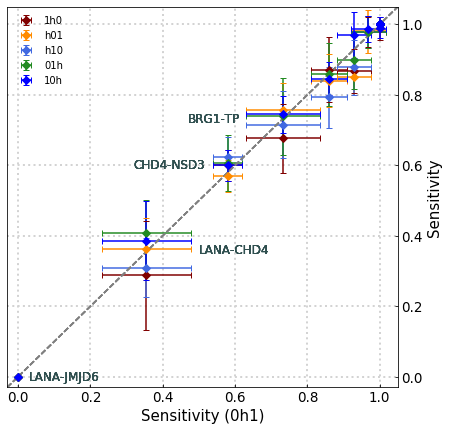

In [167]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
colors=['maroon','darkorange','royalblue','forestgreen','blue']
comparisons=['1h0','h01','h10','01h','10h']
ax.tick_params(axis='y',left=False,right=True,labelleft=False,labelright=True)
for i in range(5):
    ax.errorbar(mean[0],mean[i+1],xerr=std[0],yerr=std[i+1],fmt='D',capsize=3,color=colors[i],label=comparisons[i])
    ax.plot([-0.03,1.05],[-0.03,1.05],'--',color='gray')
    ax.set_xlim(-0.03,1.05)
    ax.set_ylim(-0.03,1.05)
    ax.set_xticks(np.linspace(0.0, 1, 6))#, minor=True)
    ax.set_yticks(np.linspace(0.0, 1, 6))#, minor=True)
    ax.set_xticklabels([round(i*0.2,2) for i in range(6)],fontsize=13.5)
    ax.set_yticklabels([round(i*0.2,2) for i in range(6)],fontsize=13.5)
    ax.grid(which='major', color='lightgray', linestyle='dotted', linewidth=2)
    ax.legend(frameon=False)
    ax.tick_params(axis="both",direction="in")
    ax.set_xlabel('Sensitivity (0h1)',fontsize=15)
    ax.set_ylabel('Sensitivity',fontsize=15)
    ax.text(0.03, -0.01,'LANA-JMJD6',fontsize=12,color='darkslategrey')
    ax.text(0.5, 0.35,'LANA-CHD4',fontsize=12,color='darkslategrey')
    ax.text(0.32, 0.59,'CHD4-NSD3',fontsize=12,color='darkslategrey')
    ax.text(0.47, 0.72,'BRG1-TP',fontsize=12,color='darkslategrey')
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()


# plt.savefig('./BET_uniref_mono_seq_switch_result.pdf',bbox_inches = "tight")

JMJD6_LANA [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [7, 7, 7, 7, 8, 6, 7, 7, 7, 6] 0.0 0.0
CHD4_LANA [2, 6, 3, 4, 3, 4, 5, 4, 1, 3] [8, 4, 7, 5, 7, 6, 5, 6, 9, 7] 0.35 0.14
NSD3_LANA [10, 9, 10, 9, 9, 9, 7, 10, 9, 10] [0, 1, 0, 1, 1, 1, 2, 0, 1, 0] 0.93 0.07
BRG1_LANA [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
TP_LANA [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
CHD4_JMJD6 [9, 9, 10, 9, 8, 10, 9, 10, 9, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
NSD3_JMJD6 [6, 7, 6, 6, 6, 6, 6, 6, 6, 7] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
BRG1_JMJD6 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
TP_JMJD6 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
NSD3_CHD4 [5, 6, 5, 6, 6, 6, 6, 6, 6, 6] [5, 4, 5, 4, 4, 4, 4, 4, 4, 4] 0.58 0.04
BRG1_CHD4 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
TP_CHD4 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0,

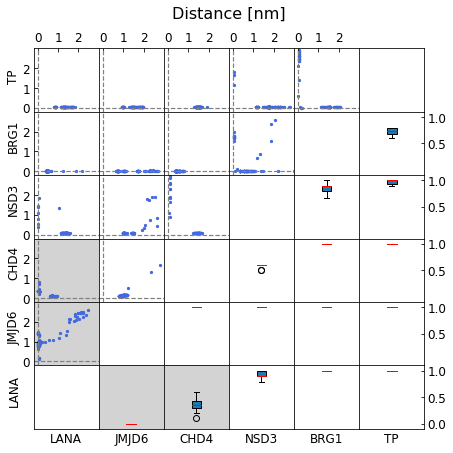

In [56]:
fig,ax=plt.subplots(6,6,figsize=(7,7))
mean, std = [],[]
# for d in ['','_r','_h01','_h10','_01h','_10h']:
bet_result=pickle.load(open(f'BET_uniref_mono_result.pkl', 'rb'))
tmp_mean,tmp_std=[],[]
for bb in range(5):
    ax[0][bb].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb][0].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb+1][5].tick_params(axis="y",direction="in",labelsize=12)
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bbb]+'_'+binder[bb]
        tmp_T=[]
        tmp_F=[]
        binder_0=[]
        binder_1=[]
        for i in trial_pair:
            binder_0.append(bet_result[f'{target}_'+trials[i[0]]][0])
            binder_0.append(bet_result[f'{target}_'+trials[i[1]]][0])
            binder_1.append(bet_result[f'{target}_'+trials[i[0]]][1])
            binder_1.append(bet_result[f'{target}_'+trials[i[1]]][1])
            tmp_T.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))>0.3]<0.2).sum())
            tmp_F.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))>0.3]<0.2).sum())
        tmp_TF=np.round(np.array(tmp_T/(np.array(tmp_T)+np.array(tmp_F))),3)
        binder_0=np.concatenate(binder_0)
        binder_1=np.concatenate(binder_1)
        print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
        ax[5-bb][bbb].yaxis.tick_right()
        box=ax[5-bb][bbb].boxplot(tmp_TF,patch_artist=True)
        tmp_mean.append(np.mean(tmp_TF))
        tmp_std.append(np.std(tmp_TF))
        ax[5-bb][bbb].set_xlim(0.5,1.5)
        ax[5-bb][bbb].set_ylim(-0.1,1.1)
        ax[5-bb][bbb].set_yticks([0.5,1])
#         ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax[bb][5-bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax1,ax2 = ax[bb][5-bbb].twinx(), ax[bb][5-bbb].twiny()

        ax[5-bbb][bb].scatter(binder_1,binder_0,c='royalblue',edgecolor='royalblue',s=5)
#         ax1.yaxis.tick_left()
        ax[5-bbb][bb].set_xlim(-0.2,3)
        ax[5-bbb][bb].set_ylim(-0.2,3)
        ax[5-bbb][bb].set_yticks([0,1,2])
        ax[5-bbb][bb].set_xticks([0,1,2])
        ax[5-bbb][bb].xaxis.tick_top()
        ax[5-bbb][bb].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
        ax[5-bbb][bb].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
        if bb!=0:
            ax[5-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
        if bbb!=5:
            ax[5-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        for patch in box['boxes']:
            patch.set(color='k')
            patch.set(facecolor = 'C0' )
        for median in box['medians']: 
            median.set(color ='red', linewidth = 1) 
#         ax[5-bb][bbb].scatter([1]*tmp_TF.shape[0],tmp_TF,s=10,color='r',edgecolors='k',linewidths=1)
mean.append(tmp_mean)
std.append(tmp_std)
ax[5][5].set_yticks([0,0.5,1])

for i in range(6):
    ax[5-i][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5-i][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)

rect = ax[5][1].patch
rect.set_facecolor('lightgray')
rect = ax[5][2].patch
rect.set_facecolor('lightgray')
rect = ax[4][0].patch
rect.set_facecolor('lightgray')
rect = ax[3][0].patch
rect.set_facecolor('lightgray')
# ax[5][0].set_xlim(0.5,1.5)
# ax[5][0].tick_params(axis='x',which='both',left=False,right=False,bottom=True,labelleft=False,labelright=False,labelbottom=True)
# ax[5][0].set_xticks([1])
for bb in range(6):
    #ax[5-bb][0].text(-1.5, 1.5,binder[bb],fontsize=12,rotation=90)
    ax[5][bb].set_xlabel(binder[bb],fontsize=12)
#     ax[5-bb][0].set_ylabel(binder[bb],fontsize=12)
ax[0][0].text(-1.5, 1.4,binder[5],fontsize=12,rotation=90)
ax[1][0].text(-1.5, 1.1,binder[4],fontsize=12,rotation=90)
ax[2][0].text(-1.5, 1.1,binder[3],fontsize=12,rotation=90)
ax[3][0].text(-1.5, 1.1,binder[2],fontsize=12,rotation=90)
ax[4][0].text(-1.5, 1.0,binder[1],fontsize=12,rotation=90)
ax[5][0].text(-0.4, 0.4,binder[0],fontsize=12,rotation=90)
ax[0][0].text(6.6,4.5,'Distance [nm]',fontsize=16)
# ax[0][5].text(6.6,4.5,'Sensitivity',fontsize=16,rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('./BET_uniref_mono_result.pdf',bbox_inches = "tight")


--------------LANA_JMJD6----------------


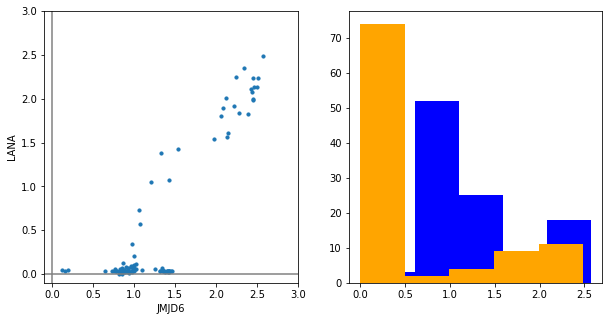

--------------LANA_CHD4----------------


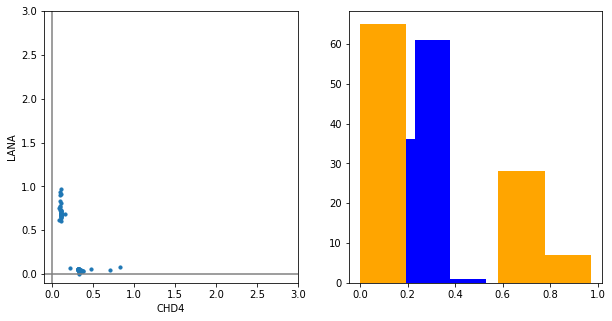

--------------LANA_NSD3----------------


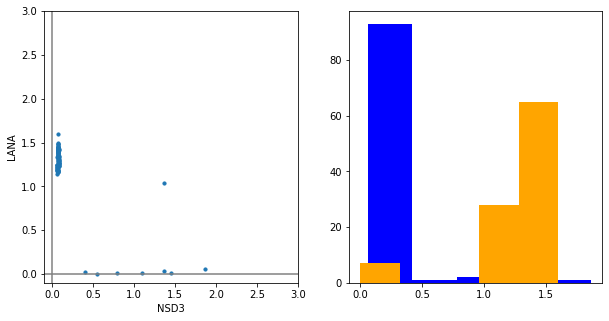

--------------LANA_BRG1----------------


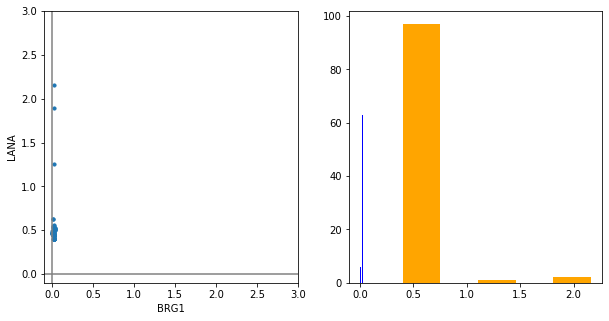

--------------LANA_TP----------------


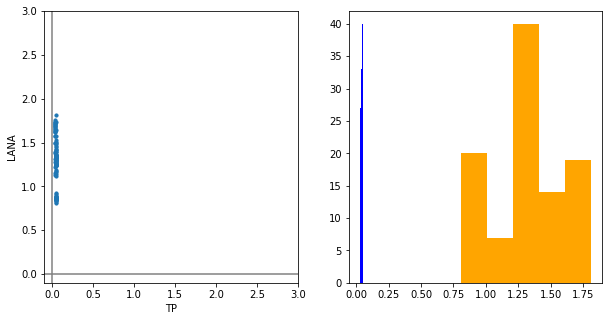

--------------JMJD6_CHD4----------------


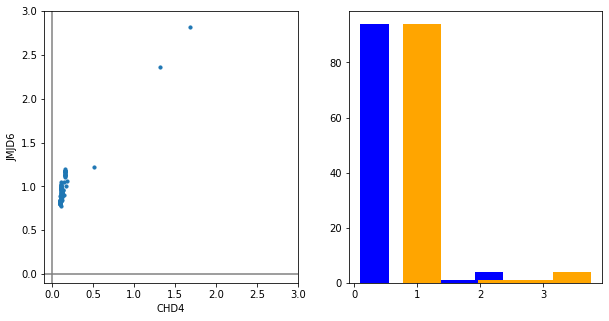

--------------JMJD6_NSD3----------------


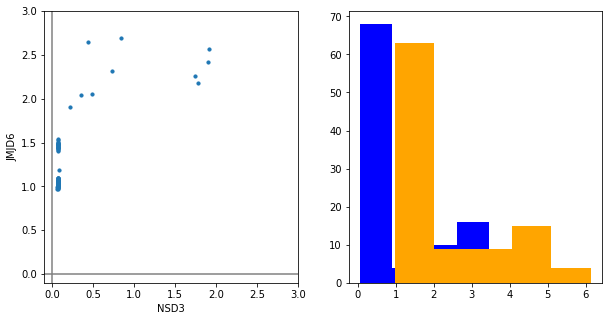

--------------JMJD6_BRG1----------------


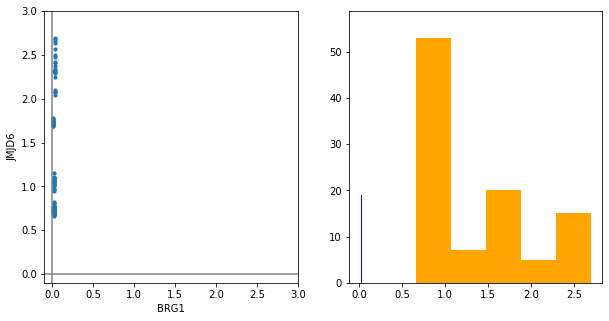

--------------JMJD6_TP----------------


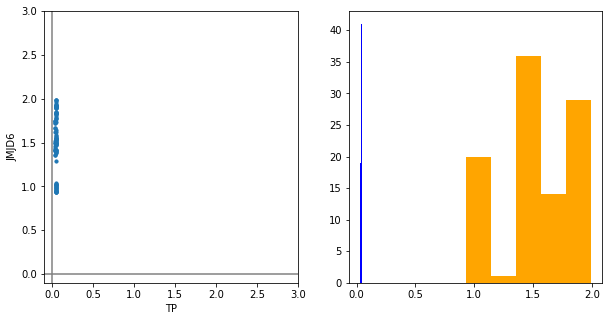

--------------CHD4_NSD3----------------


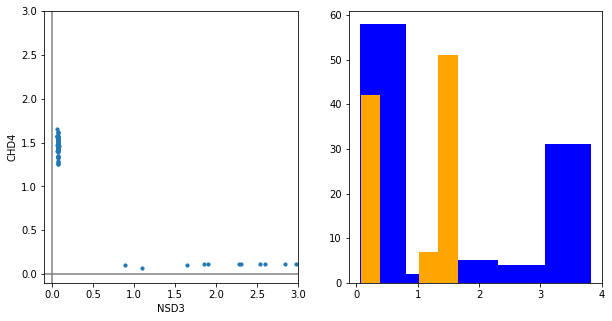

--------------CHD4_BRG1----------------


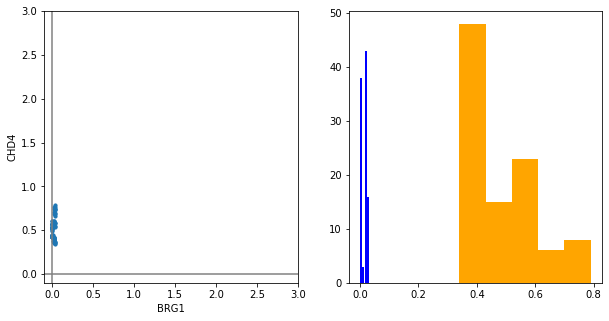

--------------CHD4_TP----------------


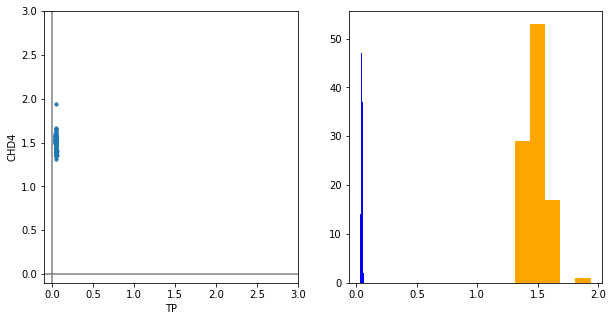

--------------NSD3_BRG1----------------


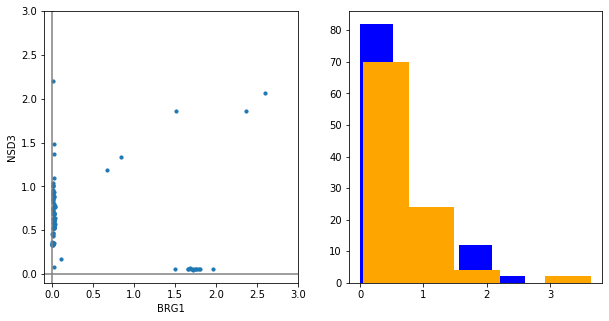

--------------NSD3_TP----------------


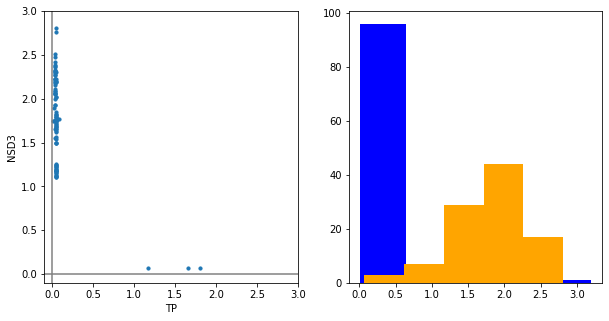

--------------BRG1_TP----------------


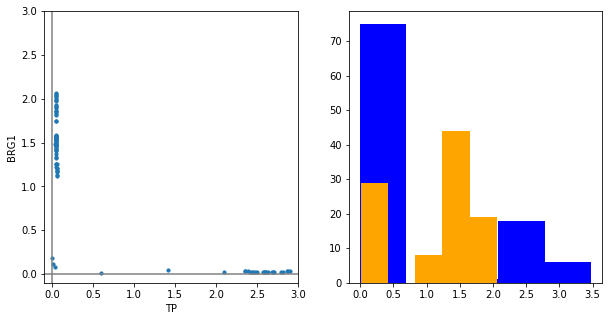

In [225]:
# NSD3_TP_rb=a.top.select('name CA and (14 <= resid) and (resid <= 18)').T
# NSD3_TP_rh=a.top.select('name CA and (62 <= resid) and (resid <= 66)')

# NSD3_BET_rb=a.top.select('name CA and (115 <= resid) and (resid <= 119)').T
# NSD3_BET_rh=a.top.select('name CA and (73 <= resid) and (resid <= 77)')
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bb]+'_'+binder[bbb]
        all_seq = glob.glob(target+'/result_msa_uniref_custom_mono_*/seq_msa_uniref_custom_unrelaxed_rank_*_model_*pdb')
        b_dis=[]
        c_dis=[]
        print(f'--------------{ target }----------------')
        for i in all_seq:
            a=md.load(i)
            chain0=a.top.to_fasta()[0]
            chain1=a.top.to_fasta()[1]
            chain2=a.top.to_fasta()[2]
            b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain0)][0]} to {binder_region[binder_seq.index(chain0)][1]} and name CA')],axis=0))
            c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain2)][0]+len(chain0)+len(chain1)} to {binder_region[binder_seq.index(chain2)][1]+len(chain0)+len(chain1)} and name CA')],axis=0))
            b_dis.append(round(abs(b-binder_dis[binder_seq.index(chain0)]),2))
            c_dis.append(round(abs(c-binder_dis[binder_seq.index(chain2)]),2))
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        if binder_seq.index(chain0) > binder_seq.index(chain2):
            ax[0].scatter(b_dis,c_dis,s=10)
            ax[0].plot([0,0],[-0.1,3],'gray')
            ax[0].plot([-0.1,3],[0,0],'gray')
            ax[0].set_xlim(-0.1,3)
            ax[0].set_ylim(-0.1,3)
            ax[0].set_xlabel(binder[binder_seq.index(chain0)])
            ax[0].set_ylabel(binder[binder_seq.index(chain2)])
            hist=ax[1].hist(b_dis,color='blue',bins=5)
            hist=ax[1].hist(c_dis,color='orange',bins=5)
        else:
            ax[0].scatter(c_dis,b_dis,s=10)
            ax[0].plot([0,0],[-0.1,3],'gray')
            ax[0].plot([-0.1,3],[0,0],'gray')
            ax[0].set_xlim(-0.1,3)
            ax[0].set_ylim(-0.1,3)
            ax[0].set_xlabel(binder[binder_seq.index(chain2)])
            ax[0].set_ylabel(binder[binder_seq.index(chain0)])
            hist=ax[1].hist(c_dis,color='blue',bins=5)
            hist=ax[1].hist(b_dis,color='orange',bins=5)
        plt.show()
            
    #print(i.split("/")[0],f"| {chain0} | ",round(b,2)," | ",round(abs(b-binder_dis[binder_seq.index(chain0)]),2),f"| {chain2} |" ,round(c,2), " | ", round(abs(c-binder_dis[binder_seq.index(chain2)]),2))
    

In [63]:
disto=pickle.load(open('./ET_LANA/result_msa_uniref_custom_mono_dist/seq_msa_uniref_custom_model_4_distogram.pkl','rb'))


In [64]:
disto_logits=disto['logits']
# disto_logits
disto_logits=jax.nn.softmax(disto_logits, axis=-1)
disto_logits[:-1,10,11].sum()

DeviceArray(1.5045881, dtype=float32)

41
42
43


<Figure size 432x288 with 0 Axes>

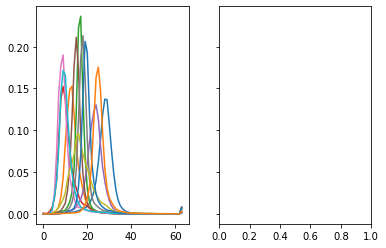

In [65]:
treshold = 0.8
hmin = 2.3125
hmax = 21.6875
(length,length2,bins) = disto_logits.shape
window =  5.
spacing = (hmax - hmin) /(bins-1)
n_bins = int(window/spacing)
L=length
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
 

def analyze_disto(histo,n_bins,treshold):         
    val = []
    for i in range(len(histo)):
        val.append(np.sum(histo[i:i+n_bins+1]))
    val = np.array(val)
    max_index = np.argsort(val)[-1]
    max_val = val[max_index]
    #print(val)
    if max_val > treshold:
        #print(max_val,max_index)
        return max_index
    else:
        return None
all_value=[]
bind_res=[list(range(41,44)),list(range(71,75))]

for i in bind_res[0]:#range(L):
    for j in bind_res[1]:#range(i+4,L):                                                             
        value = analyze_disto(disto_logits[i][j],64,treshold)
        all_value.append(value)
        if value:
            ax2.plot(disto_logits[i][j])
        else:
            ax1.plot(disto_logits[i][j])
    print(i)

 


38
39
40
41
42


<Figure size 432x288 with 0 Axes>

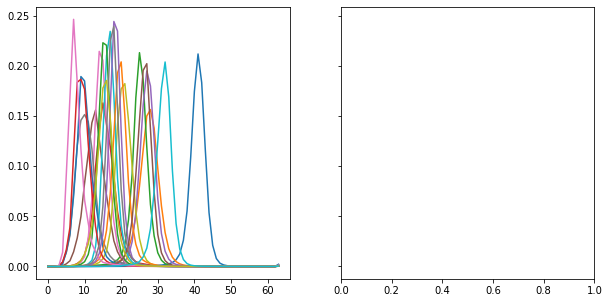

In [73]:
disto=pickle.load(open('./ET_CHD4//result_msa_uniref_mono_dist/seq_model_3_distogram.pkl','rb'))
disto_logits=disto['logits']
disto_logits=jax.nn.softmax(disto_logits, axis=-1)
treshold = 0.8
hmin = 2.3125
hmax = 21.6875
(length,length2,bins) = disto_logits.shape
window =  5.
spacing = (hmax - hmin) /(bins-1)
n_bins = int(window/spacing)
L=length
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
 


all_values=[]
bind_res=[list(range(38,43)),list(range(71,75))]
for i in bind_res[0]:#range(L):
    for j in bind_res[1]:#range(i+4,L):                                                             
        value = analyze_disto(disto_logits[i][j],64,treshold)
        all_values.append(value)
        if value:
            ax2.plot(disto_logits[i][j])
        else:
            ax1.plot(disto_logits[i][j])
    print(i)

 


39
40
41
42


<Figure size 432x288 with 0 Axes>

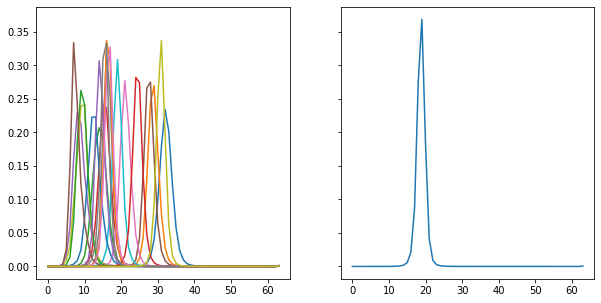

In [80]:
disto=pickle.load(open('./ET_NSD3/result_msa_uniref_custom_mono_dist/seq_msa_uniref_custom_model_3_distogram.pkl','rb'))
disto_logits=disto['logits']
disto_logits=jax.nn.softmax(disto_logits, axis=-1)
treshold = 0.8
hmin = 2.3125
hmax = 21.6875
(length,length2,bins) = disto_logits.shape
window =  5.
spacing = (hmax - hmin) /(bins-1)
n_bins = int(window/spacing)
L=length
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
 


all_values=[]
bind_res=[list(range(39,43)),list(range(70,75))]
for i in bind_res[0]:#range(L):
    for j in bind_res[1]:#range(i+4,L):                                                             
        value = analyze_disto(disto_logits[i][j],64,treshold)
        all_values.append(value)
        if value:
            ax2.plot(disto_logits[i][j])
        else:
            ax1.plot(disto_logits[i][j])
    print(i)

 


39
40
41
42


<Figure size 432x288 with 0 Axes>

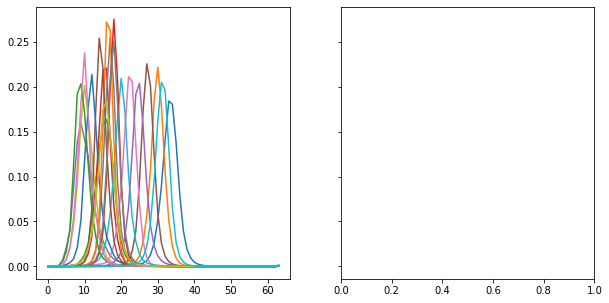

In [75]:
disto=pickle.load(open('./ET_BRG1/result_msa_uniref_mono_dist/seq_model_2_distogram.pkl','rb'))
disto_logits=disto['logits']
disto_logits=jax.nn.softmax(disto_logits, axis=-1)
treshold = 0.8
hmin = 2.3125
hmax = 21.6875
(length,length2,bins) = disto_logits.shape
window =  5.
spacing = (hmax - hmin) /(bins-1)
n_bins = int(window/spacing)
L=length
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
 


all_values=[]
bind_res=[list(range(39,43)),list(range(70,75))]
for i in bind_res[0]:#range(L):
    for j in bind_res[1]:#range(i+4,L):                                                             
        value = analyze_disto(disto_logits[i][j],64,treshold)
        all_values.append(value)
        if value:
            ax2.plot(disto_logits[i][j])
        else:
            ax1.plot(disto_logits[i][j])
    print(i)

 


14
15
16
17
18
19


<Figure size 432x288 with 0 Axes>

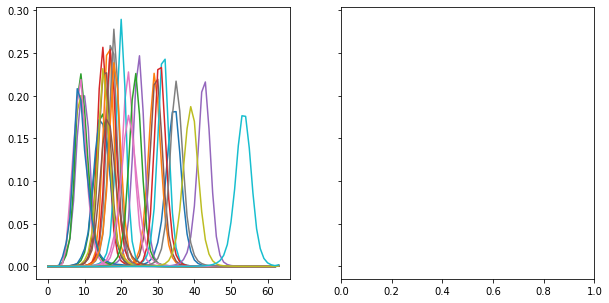

In [67]:
disto=pickle.load(open('./ET_TP/result_msa_uniref_custom_mono_dist/seq_msa_uniref_custom_model_2_distogram.pkl','rb'))
disto_logits=disto['logits']
disto_logits=jax.nn.softmax(disto_logits, axis=-1)
treshold = 0.8
hmin = 2.3125
hmax = 21.6875
(length,length2,bins) = disto_logits.shape
window =  5.
spacing = (hmax - hmin) /(bins-1)
n_bins = int(window/spacing)
L=length
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
 


all_values=[]
bind_res=[list(range(14,20)),list(range(62,67))]
for i in bind_res[0]:#range(L):
    for j in bind_res[1]:#range(i+4,L):                                                             
        value = analyze_disto(disto_logits[i][j],64,treshold)
        all_values.append(value)
        if value:
            ax2.plot(disto_logits[i][j])
        else:
            ax1.plot(disto_logits[i][j])
    print(i)

 


In [93]:
# disto['bin_edges']
tp_pdb=md.load('./ET_TP/result_msa_uniref_custom_mono_dist/seq_msa_uniref_custom_unrelaxed_rank_1_model_2.pdb')
md.compute_distances(tp_pdb,atom_pairs=[[i,j] for i in range(62,67) for j in range(tp_pdb.n_residues)] )


array([[2.2388618 , 2.1181872 , 2.0090132 , 2.1563795 , 2.0355625 ,
        2.2820232 , 1.9297165 , 1.8431246 , 1.708312  , 1.8317295 ,
        1.6508986 , 1.947366  , 1.945113  , 2.0819132 , 2.1040747 ,
        2.2767818 , 2.1515813 , 1.6911937 , 1.5743166 , 1.4573461 ,
        1.6168119 , 1.4835802 , 1.7328795 , 1.8043822 , 1.6947646 ,
        1.3465909 , 1.23247   , 1.1064261 , 1.2215117 , 1.110912  ,
        1.3605435 , 1.1914666 , 1.0214732 , 0.89846134, 0.78725475,
        0.8742347 , 0.7986532 , 0.98618346, 1.1101168 , 1.0024563 ,
        1.1362743 , 0.9339286 , 1.193742  , 1.1457071 , 1.2038089 ,
        1.0135409 , 0.71376854, 0.6148508 , 0.48647895, 0.6931729 ,
        0.5146655 , 0.64737344, 0.76193494, 0.8833514 , 1.0161134 ,
        1.1041446 , 0.9962579 , 0.38204616, 0.2527584 , 0.2879102 ,
        0.15275373, 0.35647652, 0.        , 0.2511902 , 0.32644424,
        0.4233175 , 0.4116135 , 0.5535053 , 0.37860328, 0.64530146,
        0.7229306 , 0.7432763 , 0.7911932 , 0.47